# Scikit-learn Fundamentals Tutorial

This notebook walks through the fundamentals of machine learning using scikit-learn with the famous Iris dataset.

## What you'll learn
- How to load and explore datasets
- Data preprocessing techniques
- Building and evaluating multiple machine learning models
- Cross-validation for robust model assessment
- Hyperparameter tuning to optimize model performance
- Feature importance analysis

## 1. Setting Up

First, let's import the base libraries that we'll use throughout the notebook. We'll import other specialized libraries as we need them.

In [32]:
# Base libraries used throughout the notebook
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

## 2. Loading the Dataset

The Iris dataset is a classic dataset for machine learning beginners. It contains measurements of 150 iris flowers from three different species.

Scikit-learn provides convenient access to this dataset through its `datasets` module. Each instance has 4 features:
- Sepal length
- Sepal width
- Petal length
- Petal width

The target variable is the species of iris: setosa, versicolor, or virginica.

In [33]:
# Import required library for this section
from sklearn.datasets import load_iris

print("1. Loading the Iris dataset")
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print(f"Dataset size: {X.shape}")
print(f"Features: {feature_names}")
print(f"Target classes: {target_names}")

1. Loading the Iris dataset
Dataset size: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']


## 3. Converting to DataFrame

While scikit-learn works well with NumPy arrays, converting our data to a pandas DataFrame makes exploration easier and allows for more intuitive data manipulation.

In [34]:
# Convert to DataFrame for easier exploration
df = pd.DataFrame(data=X, columns=feature_names)
df['species'] = pd.Categorical.from_codes(y, target_names)

# Display the first few rows of the DataFrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 4. Exploratory Data Analysis (EDA)

EDA helps us understand the dataset better. We'll examine basic statistics and class distribution before building any models. This step is crucial to detect patterns, anomalies, or missing values.

In [35]:
print("2. Basic Exploratory Data Analysis")

print("\nBasic statistics:")
display(df.describe())

print("\nClass distribution:")
display(df['species'].value_counts())
print("-" * 50)

2. Basic Exploratory Data Analysis

Basic statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



Class distribution:


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

--------------------------------------------------


## 5. Data Visualization

Visualizing data helps in understanding relationships between features and target variables. We'll create:
1. A pairplot to visualize relationships between all feature pairs, colored by species
2. A correlation matrix to identify highly correlated features

3. Data Visualization


<Figure size 1000x800 with 0 Axes>

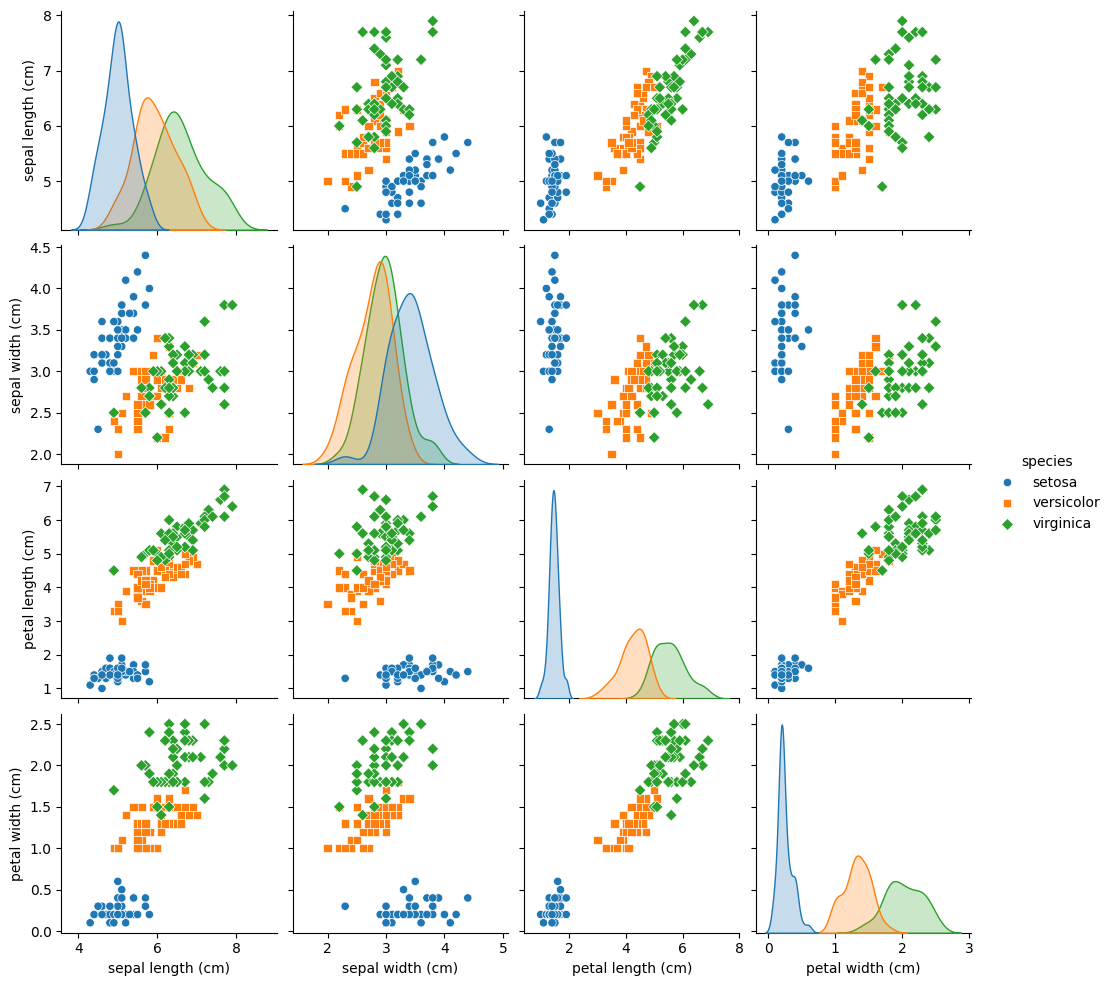

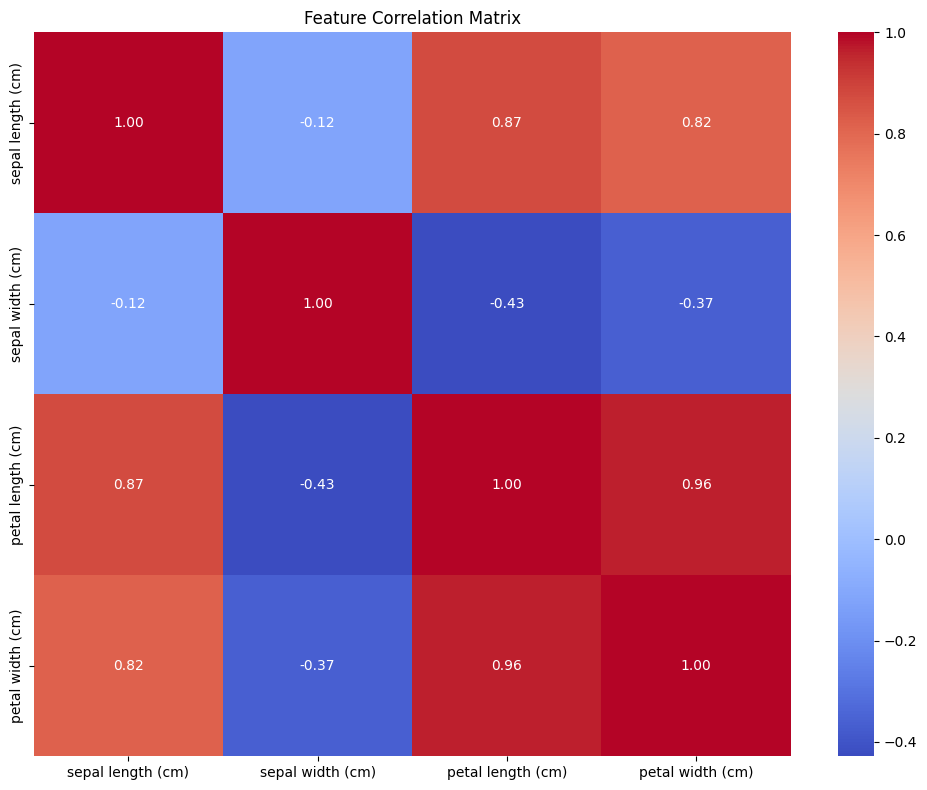

In [36]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

print("3. Data Visualization")

# Pairplot of the features
plt.figure(figsize=(10, 8))
pairplot = sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.show()

# Feature correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.drop('species', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

### Key Visualization Insights

- **Pairplot**: Shows how well the species can be separated using different feature combinations. You can see that some pairs of features (especially those involving petal measurements) create clear separations between species.

- **Correlation Matrix**: Reveals which features are strongly correlated with each other. High correlation between features (near 1.0) might indicate redundancy in your data.

## 6. Data Preprocessing

Before training models, we need to:
1. Split the data into training and testing sets
2. Standardize the features

**Why split the data?** To evaluate model performance on unseen data

**Why standardize?** Many ML algorithms perform better when features are on a similar scale

In [37]:
# Import preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("4. Data Preprocessing")
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Data has been scaled using StandardScaler")
print("-" * 50)

4. Data Preprocessing
Training set size: (105, 4)
Test set size: (45, 4)
Data has been scaled using StandardScaler
--------------------------------------------------


### Standardization Explained

StandardScaler transforms each feature to have:
- Mean = 0
- Standard deviation = 1

Why fit on training data only? To prevent data leakage - the test set should be treated as completely new, unseen data.

## 7. Model Training and Evaluation

Now we'll train multiple classification models and compare their performance. We'll use:
- K-Nearest Neighbors (KNN) - a distance-based classifier
- Support Vector Machine (SVM) - finds optimal separating hyperplanes
- Decision Tree - uses recursive feature-based splits
- Random Forest - ensemble of decision trees
- Logistic Regression - a linear model for classification

In [38]:
# Import model libraries and evaluation metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("5. Model Training and Basic Evaluation")
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=200)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

print("-" * 50)

5. Model Training and Basic Evaluation

Training K-Nearest Neighbors...
Accuracy: 1.0000
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Training Support Vector Machine...
Accuracy: 1.0000
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00    

Accuracy: 1.0000
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Training Logistic Regression...
Accuracy: 1.0000
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

-------------

### Understanding Evaluation Metrics

1. **Accuracy**: Proportion of correctly classified instances
2. **Confusion Matrix**: Shows predicted vs actual class assignments
   - Rows represent actual classes
   - Columns represent predicted classes
   - Diagonal elements are correct predictions
3. **Classification Report**:
   - **Precision**: How many selected items are relevant? (TP/(TP+FP))
   - **Recall**: How many relevant items are selected? (TP/(TP+FN))
   - **F1-score**: Harmonic mean of precision and recall
   - **Support**: Number of occurrences of each class in the test set

## 8. Cross-validation

Cross-validation provides a more robust assessment of model performance by training and testing on different subsets of the data multiple times.

In [39]:
# Import cross-validation tools
from sklearn.model_selection import cross_val_score

print("6. Cross-validation")
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f"{name} - Mean CV Accuracy: {cv_scores.mean():.4f}, Std: {cv_scores.std():.4f}")

6. Cross-validation
K-Nearest Neighbors - Mean CV Accuracy: 0.9733, Std: 0.0249
Support Vector Machine - Mean CV Accuracy: 0.9667, Std: 0.0211
Decision Tree - Mean CV Accuracy: 0.9533, Std: 0.0340


Random Forest - Mean CV Accuracy: 0.9667, Std: 0.0211
Logistic Regression - Mean CV Accuracy: 0.9733, Std: 0.0249


### What is Cross-validation?

In 5-fold cross-validation:
1. The dataset is divided into 5 equal "folds"
2. Training occurs 5 times, each time using 4 folds for training and 1 fold for testing
3. The 5 resulting scores are averaged to give a final performance estimate

Benefits:
- More reliable estimate of model performance
- Makes better use of available data
- Gives an indication of how consistent the model's performance is (via standard deviation)

## 9. Hyperparameter Tuning

Most ML algorithms have hyperparameters that need to be tuned for optimal performance. GridSearchCV tests all possible combinations of specified parameter values to find the best set.

In [40]:
# Import hyperparameter tuning tools
from sklearn.model_selection import GridSearchCV

print("7. Hyperparameter Tuning")

# Example with K-Nearest Neighbors
print("\nTuning K-Nearest Neighbors classifier:")
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_knn.best_params_}")
print(f"Best cross-validation accuracy: {grid_knn.best_score_:.4f}")

# Evaluate the tuned model on the test set
best_knn = grid_knn.best_estimator_
y_pred_tuned = best_knn.predict(X_test_scaled)
print(f"Test accuracy with tuned model: {accuracy_score(y_test, y_pred_tuned):.4f}")

7. Hyperparameter Tuning

Tuning K-Nearest Neighbors classifier:


Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validation accuracy: 0.9429
Test accuracy with tuned model: 1.0000


### How GridSearchCV Works

GridSearchCV performs an exhaustive search over specified parameter values:

1. For each parameter combination:
   - Run k-fold cross-validation (5-fold in our case)
   - Calculate the mean score across all folds
2. Select the parameter combination with the best mean score
3. Retrain the model on the entire training set using the best parameters

In our case, it's testing: 5 (neighbors) × 2 (weights) × 2 (metrics) = 20 different parameter combinations.

## 10. Feature Importance Analysis

Not all features contribute equally to predictions. Understanding feature importance helps with:
- Feature selection
- Model interpretability
- Domain knowledge

Random Forest provides a built-in method to estimate feature importance.

8. Feature Importance Analysis


             Feature  Importance
3   petal width (cm)    0.433982
2  petal length (cm)    0.417308
0  sepal length (cm)    0.104105
1   sepal width (cm)    0.044605


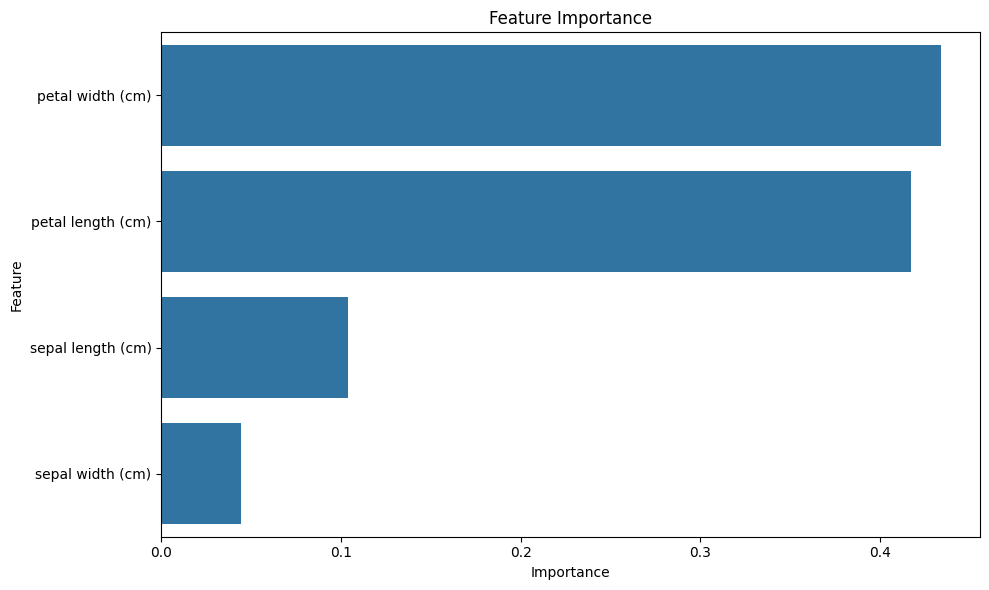

Tutorial completed! You've successfully walked through the fundamental steps of a machine learning workflow using scikit-learn!


In [41]:
# Note: We've already imported the necessary libraries (RandomForest, matplotlib, seaborn, etc.)

print("8. Feature Importance Analysis")
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

print("Tutorial completed! You've successfully walked through the fundamental steps of a machine learning workflow using scikit-learn!")

## Conclusion

Congratulations! You've completed a comprehensive introduction to scikit-learn. In this tutorial, you've learned:

1. How to load and explore a dataset
2. Data preprocessing techniques
3. Training various machine learning models
4. Evaluating models using different metrics
5. Cross-validation for robust performance estimation
6. Hyperparameter tuning to optimize model performance
7. Feature importance analysis

### Next Steps:
- Try using different datasets
- Experiment with more advanced models
- Implement a full machine learning pipeline
- Explore feature engineering techniques
- Learn about model deployment